# Принятие решений в бизнесе 

<div  style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
    
**Описание проекта:**

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 
</div>

<div  style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
    
**Описание данных:**

Файл /datasets/hypothesis.csv. 
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Файл /datasets/orders.csv. 
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
*group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv. 
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста
</div>

<div  style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
    
**План работы**
    
1. Загрузка данных и изучение данных  
2. Приоритизация гипотез  
3. Анализ A/B-теста  
    3.1. Построем график кумулятивной выручки по группам  
    3.2. Построем график кумулятивного среднего чека по группам.  
    3.3. Построем график относительного изменения кумулятивного среднего чека группы B к группе A  
    3.4. Построем график кумулятивного среднего количества заказов на посетителя по группам  
    3.5. Построем график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A  
    3.6. Построем точечный график количества заказов по пользователям
    3.7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя  
    3.8. Построем точечный график стоимостей заказов.  
    3.9. Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов  
    3.10. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами между группами по «сырым» данным  
    3.11.  Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным  
    3.12. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами между группами по «очищенным» данным  
    3.13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным
4. Общтй вывод
</div>



## 1. Загрузка данных и изучение данных

In [69]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

In [70]:
# cчитаем CSV-файлы с данными

try:
    hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
except:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')

display(hypothesis.head(5))
display(hypothesis.shape)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


(9, 5)

In [71]:
# cчитаем CSV-файлы с данными

try:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
except:
    orders = pd.read_csv('/datasets/orders.csv')

orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

display(orders.head(5))
display(orders.shape)


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


(1197, 5)

In [72]:
# cчитаем CSV-файлы с данными

try:
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')
except:
    visitors = pd.read_csv('/datasets/visitors.csv')

visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

display(visitors.head(5))
display(visitors.shape)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


(62, 3)

In [73]:
hypothesis.info() # выведем общую информацию 
display(hypothesis.duplicated().sum(), hypothesis.isna().sum()) # проверим пропуски данных и дубликаты данных 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


0

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

In [74]:
visitors.info() # выведем общую информацию 
display(visitors.duplicated().sum(), visitors.isna().sum()) # проверим пропуски данных и дубликаты данных 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


0

date        0
group       0
visitors    0
dtype: int64

In [75]:
orders.info() # выведем общую информацию 
display(orders.duplicated().sum(), orders.isna().sum()) # проверим пропуски данных и дубликаты данных 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


0

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [76]:
#попробуем для начала узнать существует ли в данных такая ситуация
#создадим новый  DataFrames   только с пользователями и группой
data=orders[['visitorId', 'group']] 
display(data.head(5))
#пойдем по обратной логике
#узнаем количество дубликатов Это значит что пользователь с одним ID делал несколько заказов
display(data['visitorId'].nunique())
display(data.duplicated().sum())
# Мы узнали, что уникальных пользователей 1031
# И мы имеем 108 пар совпадений ID и группы пользователя

,visitorId,group
0,3312258926,B
1,3642806036,B
2,4069496402,A
3,1196621759,B
4,2322279887,B


1031

108

In [77]:
# Удалим совпадений пар ID и группы пользователя, то есть полные дубликаты.
data=data.drop_duplicates ()
# проверим теперь количество уникальных ID пользователей
display(data['visitorId'].nunique())

1031

Количество уникальных пользователей осталось таким же. Следовательно пользователи с уникальным  ID попадают только в одну группу.

## 2. Приоритизация гипотез

In [78]:
# Применяю фреймворк ICE для приоритизации гипотез. 
hypothesis['ICE']=round(hypothesis['Confidence']*hypothesis['Impact']/hypothesis['Efforts'], 2)
pd.set_option('display.max_colwidth', 200)
display(hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))


,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Наиболее перспективные гипотезы: 8,0,7,6,2. Гипотеза 8 обладает наибольшей силой. Ее параметр ICE равен 16.

In [79]:
# Применяю фреймворк RICE для приоритизации гипотез. 
hypothesis['RICE']=(hypothesis['Confidence']*hypothesis['Impact']*hypothesis['Reach'])/hypothesis['Efforts']
pd.set_option('display.max_colwidth', 200)
display(hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))


,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Наиболее перспективные гипотезы: 7,2,0,6,8. Теперь на первом месте гипотеза 7. Ее параметр RICE равен 112, в то время как у других гипотез значительно меньше. Это связано с тем, что RICE включает в себя охват пользователей.

RICE предназначен для оценки того, на какое количество людей каждая гипотеза повлияет в течение определенного периода времени, и сколько пользователей увидят изменения.
ICE отражает влияние гипотезы  на пользователей. 

## 3. Анализ A/B-теста

### 3.1. Построем график кумулятивной выручки по группам. 

In [80]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

In [81]:
# соберём агрегированные кумулятивные данные по дням о заказах в несколько действий. 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [82]:
# соберём  агрегированные кумулятивные данные по дням о посетителях интернет-магазина: 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [83]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5)) 


        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


In [84]:
#произведем проверку максимальной и минимальной даты в таблице заказов
print(max(orders['date']))
print(min(orders['date']))
#произведем проверку максимальной и минимальной даты cumulativeData
print(max(cumulativeData['date']))
print(min(cumulativeData['date']))

2019-08-31 00:00:00
2019-08-01 00:00:00
2019-08-31 00:00:00
2019-08-01 00:00:00


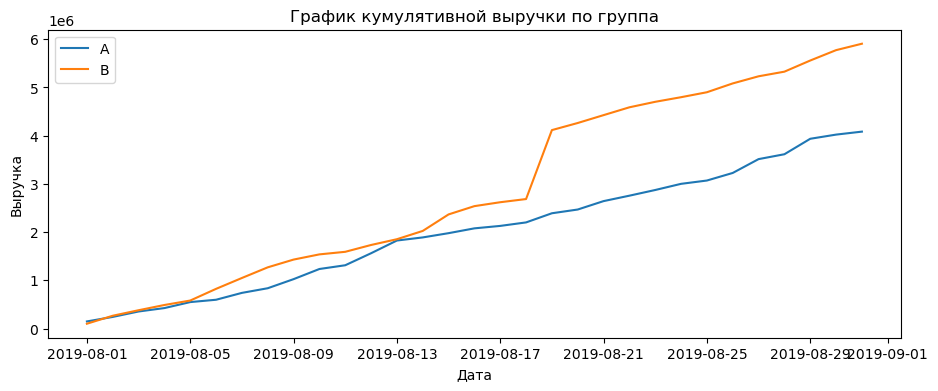

In [85]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(11,4))
# Строим график кумулятивной  выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график кумулятивной выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.title('График кумулятивной выручки по группа')
plt.legend() 
plt.show()


### 3.1. Вывод
Выручка увеличивается в течение всего теста. Обратим внимание на то, что группа В лидирует по выручке. Однако графики выручки группы В в середине теста резко растет. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. Далее проверим влияние аномально больших заказов. Возможно лидирование группы В изменится в их отсутствии.

### 3.2. Построем график кумулятивного среднего чека по группам. 

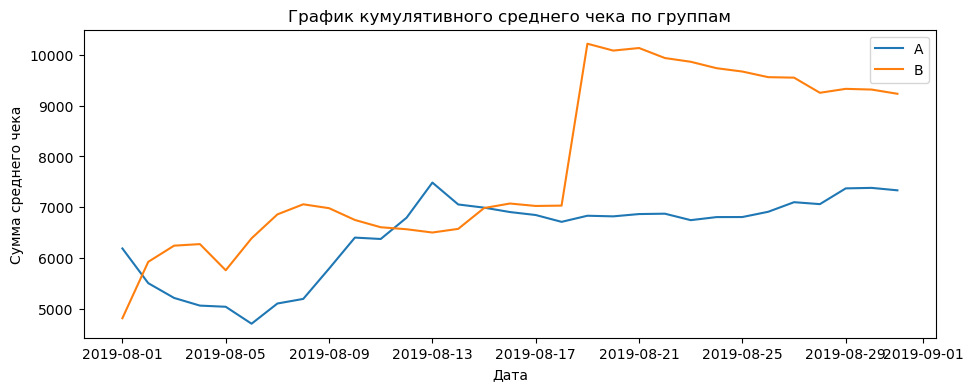

In [86]:
plt.figure(figsize=(11,4))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.ylabel('Сумма среднего чека')
plt.xlabel('Дата')
plt.title('График кумулятивного среднего чека по группам')
plt.legend() 
plt.show()

### 3.2.  Вывод
Кумулятивное значение среднего чека сильно колеблется в первых двух третях теста. Затем средний чек становится равномернее. Можем увидеть тенденцию к падению среднего чека для группы В. Можем заметить небольшой рост для группы А, но мы не можем сказать тенденция ли это на данном этапе. Следовательно рано принимать решение по данной метрике. Необходимо провести анализ вбросов. Возможно, в группу B в первой половине теста попали крупные заказы (резкий всплеск на графике). Тогда группе В нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

### 3.3. Построем график относительного изменения кумулятивного среднего чека группы B к группе A. 

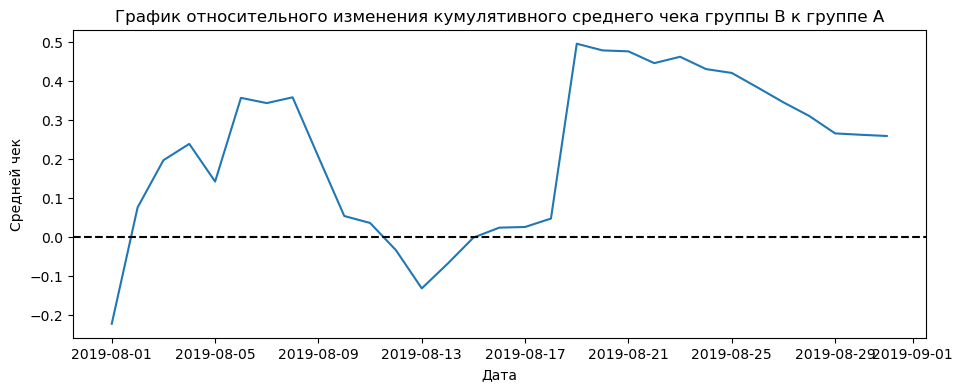

In [87]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(11,4))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.xlabel('Дата')
plt.ylabel('Средней чек')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.show()

### 3.3. Вывод
Наблюдаем несколько "скачков" графика. Из которых несколько является очень резким. Попробуем отыскать в эти даты "аномальные" заказы.

### 3.4.  Построем график кумулятивного среднего количества заказов на посетителя по группам.

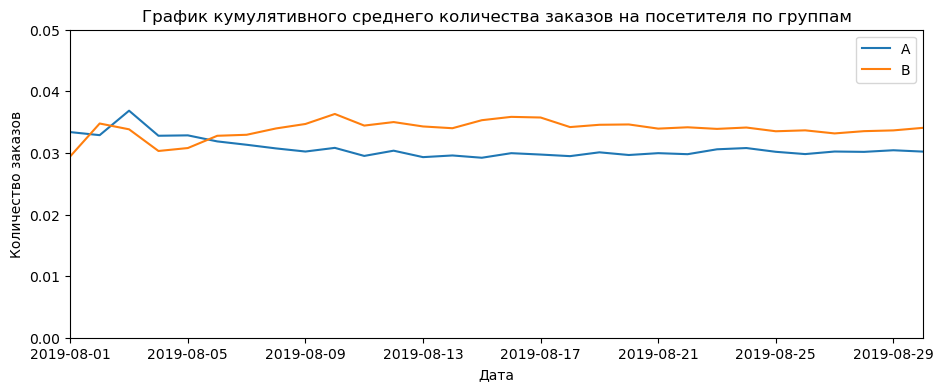

In [88]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(11,4))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 30), 0, 0.05])
plt.ylabel('Количество заказов')
plt.xlabel('Дата')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.legend() 
plt.show()

### 3.4. Вывод
В начале исследования группа А имела, большее среднее количество заказов на посетителя и скачки роста, но с течением времени группа Б обогнала группу А резким рывком и установилась на более высоком уровне. Так же отметим, что обе группы колебались около одного значения, Обе группы зафиксировалась на каком-то среднем значении и их графики стали практически параллельны. Из данных графиков нам понятно, что делать выводы рано. В будущих шагах следует проанализировать аномалии, возможно, они изменят картину. 

### 3.5. Построем график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 

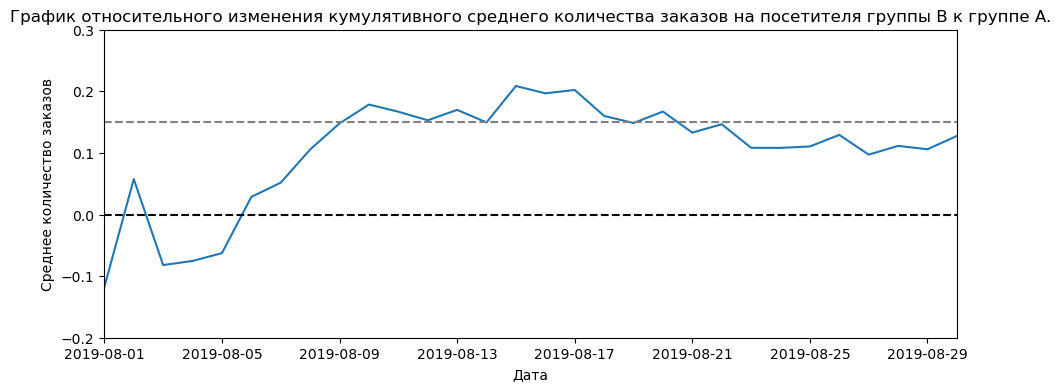

In [89]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(11,4))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.ylabel('Среднее количество заказов')
plt.axis(["2019-08-01", '2019-08-30', -0.2, 0.3])
plt.xlabel('Дата')
plt.show()


### 3.5. Вывод
В начале наблюдения видим, скачки  среднего количество заказов на посетителя группы В относительно группы А, но уже в первую неделю исследования группа В стала лидировать. Прирост составил не менее 10%. График имеет скачки  среднего количества заказов на посетителя. Отношение среднего количество заказов на посетителя ещё не установилось. Делать выводы по тесту рано. Перейдем к анализу "аномалий" и посмотрим, что это даст для исследования. 

### 3.6. Построем точечный график количества заказов по пользователям. 

In [90]:
ordersByUsers = (orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'}))

ordersByUsers.columns = ['visitorId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

       visitorId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


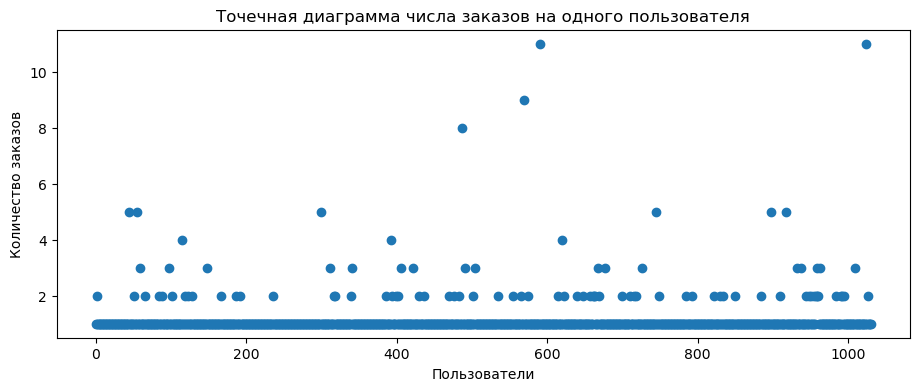

In [91]:
x_values = pd.Series(range(0,len(ordersByUsers)))


plt.figure(figsize=(11,4))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.ylabel('Количество заказов')
plt.xlabel('Пользователи')
plt.title('Точечная диаграмма числа заказов на одного пользователя')

plt.show()

### 3.6. Вывод
Видим много пользователей с 2-4 заказами. Сколько их сложно оценить по графику, но мы можем сказать, что доля покупателей с двумя заказами достаточно велика. Можно ли считать аномалиями 4 заказа и более? Необходимо исследовать дальше.

### 3.7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. 

In [92]:
percentile1=np.percentile(ordersByUsers['orders'], [90, 95, 99])
percentile1

array([1., 2., 4.])

### 3.7. Вывод
Мы видим, что вывод перцентилей количества заказов на пользователя показал, что мы ошибались, делая вывод по точечному графику количества заказов. И наши клиенты делают только один заказ. Нормально ли это? К сожалению, исходя из вводных данных, мы не можем сказать какими товарами мы торгуем. показывает ли это проблемы в нашем бизнесе? Не более 5% пользователей оформляли больше, чем 2 (т. е. 5%) заказов. Разумно выбрать 2 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.

### 3.8. Построем точечный график стоимостей заказов. 

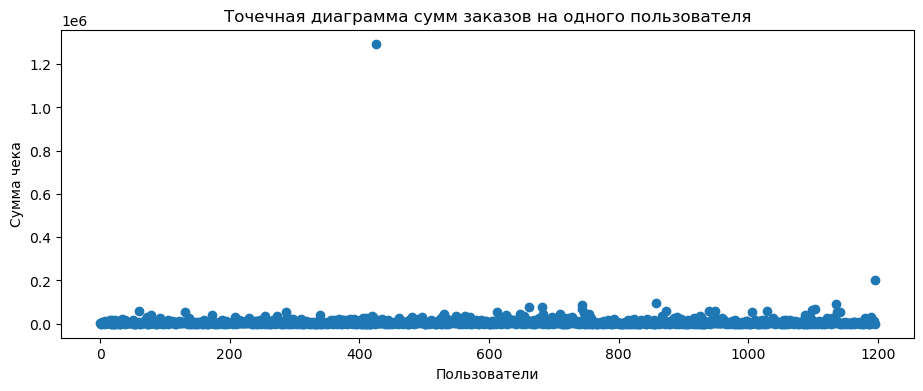

In [93]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(11,4))
plt.scatter(x_values,orders['revenue']) 
plt.ylabel('Сумма чека')
plt.xlabel('Пользователи')
plt.title('Точечная диаграмма сумм заказов на одного пользователя')

plt.show()

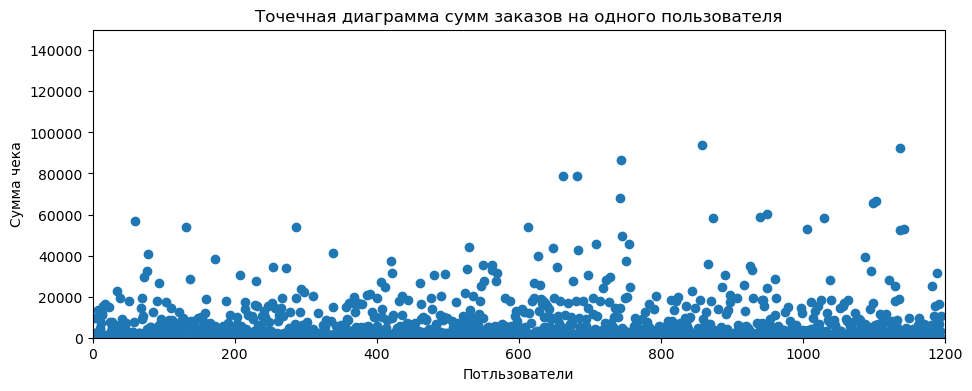

In [94]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(11,4))
plt.scatter(x_values,orders['revenue']) 
plt.axis([0, 1200, 0, 150000])
plt.ylabel('Сумма чека')
plt.xlabel('Потльзователи')
plt.title('Точечная диаграмма сумм заказов на одного пользователя')

plt.show()

### 3.8. Вывод
Сразу видим явные выбросы на графике. Свыше 1 200 000 руб.  на 200 000 руб. Медианный чек около 3 000 руб.
Средний чек около 8 000. На средний чек явно оказывают свое влияние выбросы данных.  

### 3.9. Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [95]:
percentile2=np.percentile(orders['revenue'], [90, 95, 99])
percentile2

array([18168. , 28000. , 58233.2])

### 3.9. Вывод
Не более 5% заказов дороже 28000 рублей и не более 1% дороже 58000 рублей. Для дальнейшего проведения исследования не будем брать в расчет заказы стоимость которых более 28000 рублей. 

### 3.10. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами между группами по «сырым» данным.

In [96]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

H_0: Статистически значимых различий в среднем числе заказов между группами А и В по "сырым" данным нет.

H_1: Существуют статистически значимые различия в среднем числе заказов между группами А и В по "сырым" данным.

alpha = 0.05

Для сравнения гипотез применим тест Манна-Уитни.

In [97]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)


ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB.columns = ['visitorId', 'orders']


sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)



print("P-value:", "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Прирост в среднем количестве заказов ", "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


P-value: 0.017
Прирост в среднем количестве заказов  0.138


### 3.10. Вывод
Первое число — p-value = 0.017 значительно меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет - отвергаем. 
Анализируем «сырые данные» и понимаем, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего группы B к группе A равен 13.7%.


### 3.11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 

H_0: Статистически значимых различий в размере среднего чека заказа между группами А и В по "сырым" данным нет.

H_1: Существуют статистически значимые различия в размере среднего чека заказа между группами А и В по "сырым" данным.

alpha = 0.05

Для сравнения гипотез применим тест Манна-Уитни.

In [98]:
print("P-value:" , '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("Прирост в среднем чеке заказов" ,'{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

P-value: 0.729
Прирост в среднем чеке заказов 0.259


### 3.11. Вывод 
P-value значительно больше 0.05. Не отвергаем нулевую гипотезу В среднем чеке между группами различий нет по неочищенным данным.

### 3.12. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами между группами по «очищенным» данным. 

H_0: Статистически значимых различий в среднем числе заказов между группами А и В по "очищенным" данным нет.

H_1: Существуют статистически значимые различия в среднем числе заказов между группами А и В по "очищенным" данным.

alpha = 0.05

Для сравнения гипотез применим тест Манна-Уитни.

In [99]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], 95)]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], 95)]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'],  95)]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print('Анамальных пользоваталей', abnormalUsers.shape[0]) 

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorId, dtype: int64
Анамальных пользоваталей 74


In [100]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [101]:
print("P-value:", '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Прирост в среднем количестве заказов ", '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

P-value: 0.013
Прирост в среднем количестве заказов  0.173


### 3.12. Вывод
Результаты по среднему количеству заказов практически не изменились. 
Как и в случае с сырыми данными, статистическая значимость достигнута. Относительный прирост среднего группы B к конверсии группы A  учеличился еще на 3,5% и составил 17,3 %.
Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет - отвергаем. 


### 3.13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

H_0: Статистически значимых различий в размере среднего чека заказа между группами А и В по "очищенным" данным нет.

H_1: Существуют статистически значимые различия в размере среднего чека заказа между группами А и В по "очищенным" данным.

alpha = 0.05

Для сравнения гипотез применим тест Манна-Уитни.

In [102]:
print("P-value:",
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print("Прирост в среднем чеке заказов" ,
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
         - 1
    )
) 


P-value: 0.738
Прирост в среднем чеке заказов -0.020


### 3.13. Вывод
P-value увеличился. Тенденция осталась такая же. Не отвергаем нулевую гипотезу. В среднем чеке между группами различий нет.
Но при очистки данных мы увидели, что теперь средний чек группы В стал меньше среднего чека группы А на 2%. Такая разница в средних чеках не может быть признана значительной.
Анамалии сильно влияют на результаты A/B-теста!

## 4. Общий вывод

Примем решение по результатам теста. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

Выборка данных достаточного размера и исключение проблемы подглядывания позволили провести тестирование сравнения групп без искажений. В результате анализа кумулятивных метрик по выручке, среднему чеку и конверсии, группа B почти всегда была лидером. Однако, возникли сомнения из-за резких колебаний среднего чека в группе B, но после очистки данных разница средних чеков стала незначительной. Несмотря на это, нет оснований сомневаться в проведении теста и его результате. Показатель конверсии в группе B как до, так и после очистки данных превышает показатель в группе A - соответственно, на 13.8% и 17.3%. Эта разница является статистически значимой, поэтому мы можем заключить, что группа B является победителем и остановить A/B тест. Кроме того, следует обратить внимание на то, почему наши пользователи делают мало заказов и как это можно изменить, но это будет вопросом для дальнейшего исследования.